# Tarefa 2 - Flight Price Prediction

O dataset que elegemos para a tarefa de grupo foi o **Flight Price Prediction** cujo objetivo é analisar as seguintes questões:
- O preço varia entre as companhias aéreas?
- Como é que o preço é afetado quando os bilhetes são comprados apenas 1 ou 2 dias antes da partida?
- O preço varia baseado no período de partida e de chegada?
- Como é que o preço varia entre a origem e o destino?
- Como é que o preço varia entre a classe Economy e a classe Business?

Pelo que o atributo objetivo do nosso estudo será o preço do bilhete.


O dataset apresenta os seguintes atributos:

- Airline: O nome da companhia aérea.
- Flight: Código do voo.
- Source City: Cidade de onde parte o voo.
- Departure Time: Período de tempo em que sai o voo (Early Morning, Morning, Afternoon, Evening, Night, Late_Night).
- Stops: Número de paragens entre a origem e o destino.
- Arrival Time: Período de tempo em que chega o voo (Early Morning, Morning, Afternoon, Evening, Night, Late_Night)
- Destination City: Cidade de destino do voo.
- Class: Informação sobre o tipo de lugar do voo (Business, Economy).
- Duration: Duração do voo em horas.
- Days Left: Dias que faltam até ao voo, calculado pela subtração ao dia da viagem do dia onde foi marcado o voo. 
- Price: Variável objetivo que guarda o valor do bilhete. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
import researchpy as rp
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

#### Import Dataset

Iniciamos o estudo do dataset pelo load dos dados numa dataframe panda.

In [2]:
dataf = pd.read_csv('./datasets/flight_price.csv')

Imprimimos as primeiras linhas do dataframe.

In [3]:
dataf.head()

,serial_number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Imprimimos as últimas linhas do dataframe:

In [4]:
dataf.tail()

,serial_number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


De forma a verificarmos quantas entradas e atributos o dataset possui:

In [5]:
print("Este dataset tem {} colunas e {} linhas".format(dataf.shape[1],dataf.shape[0]))

Este dataset tem 12 colunas e 300153 linhas


Em seguida, geramos as estatísticas descritivas das colunas numéricas:

In [6]:
dataf.describe()

,serial_number,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


De forma a obtermos um resumo da informação (número de valores não nulos em cada coluna, o tipo de dados de cada coluna e o uso de memória) contida no Dataframe:

In [7]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   serial_number     300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
dataf.nunique()

serial_number       300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

Podemos verificar que:
- existem apenas 6 companhias áreas
- existem apenas 6 cidades de origem
- existem apenas 6 cidades de destino
- existem 6 tipos de período de tempo diferentes
- existem 2 tipos de classes para viajar


Os valores possíveis são os seguintes:

In [9]:
for col in dataf.columns:
    if dataf[col].dtype == 'object':
        print(col, end=': ')
        print(dataf[col].unique())

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight: ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class: ['Economy' 'Business']


#### Missing Values

Verificamos se existem missing values:

In [10]:
dataf.isna().any()

serial_number       False
airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [11]:
print(dataf.isna().sum())

serial_number       0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


Como é possível verificar, o nosso dataset não apresenta missing values

#### Duplicated Values

De forma a verificar se o dataset tem linhas duplicadas:

In [12]:
dataf.duplicated().sum()

0

Como é possível verificar o dataset não apresenta missing values nem tem linhas duplicadas.

Através desta análise fomos capazes de verificar que o dataset que escolhemos possui:
- 300153 entradas
- 12 atributos
- Todos valores não nulos
- Não existem missing values

Podemos dividir os atributos presentes no dataset nas seguintes categorias:
- **Categóricos** (airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class)
- **Numéricos** (serial_number, duration,days_left,price)

## Data Preperation

In [13]:
dataf['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [14]:
dataf['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

O grupo considerou que os atributos 'serial_number' e 'flight' não são relevantes para o estudo, pelo facto de apenas serem identificadores do voo, pelo que podemos removê-los do dataframe.

## Data Analysis

### Análise dos atributos

#### Companhias aéreas

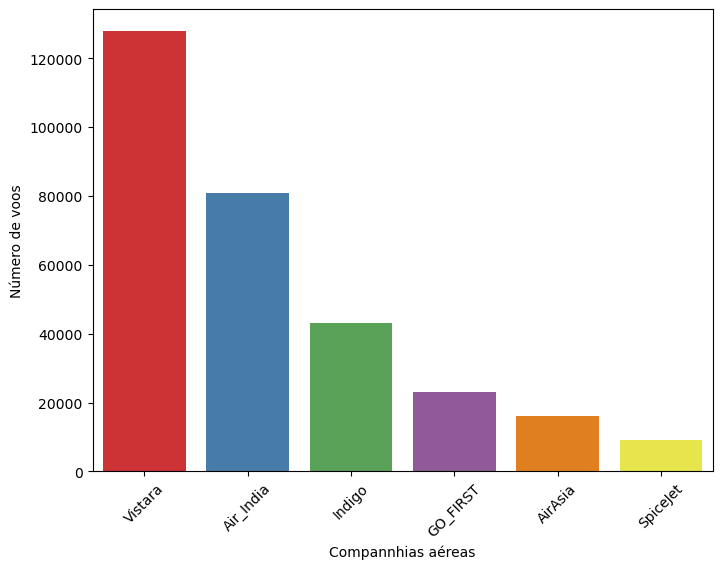

In [15]:
airline_counts = dataf['airline'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=airline_counts.index, y=airline_counts.values, palette="Set1")
plt.xlabel('Compannhias aéreas')
plt.ylabel('Número de voos')
plt.xticks(rotation=45)
plt.show()

Como podemos observar a companhia aérea **Vistara** é a companhia aérea mais utilizada no dataset.

#### Origem

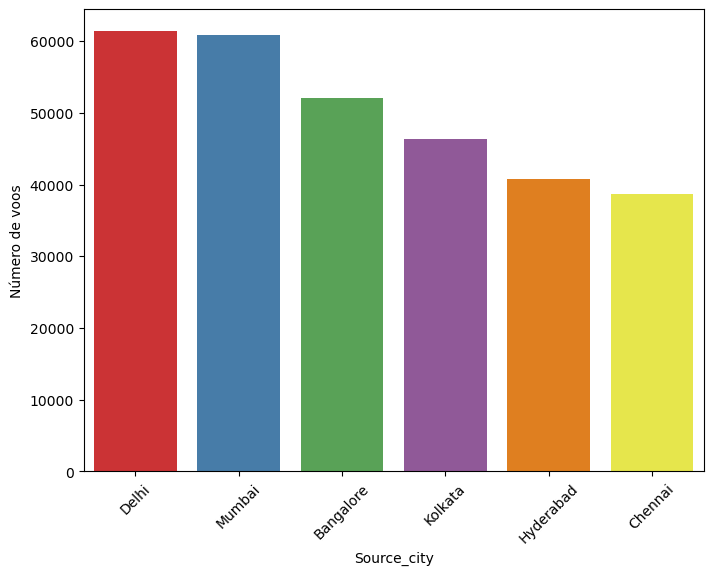

In [16]:
source_counts = dataf['source_city'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="Set1")
plt.xlabel('Source_city')
plt.ylabel('Número de voos')
plt.xticks(rotation=45)
plt.show()

Como é possível observar a cidade de origem de onde partiram mais voos foi **Delhi**.

#### Destino

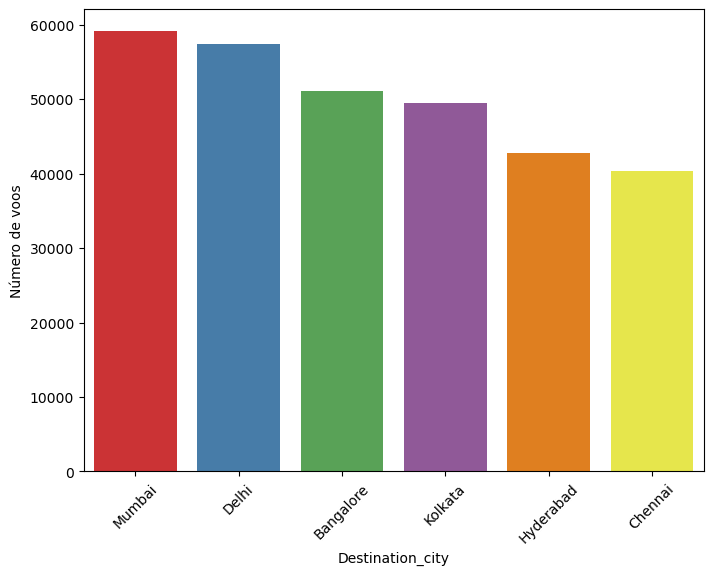

In [17]:
destination_counts = dataf['destination_city'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=destination_counts.index, y=destination_counts.values, palette="Set1")
plt.xlabel('Destination_city')
plt.ylabel('Número de voos')
plt.xticks(rotation=45)
plt.show()

Como é possível observar a cidade para onde chegaram mais voos foi **Mumbai**.

#### Número de paragens

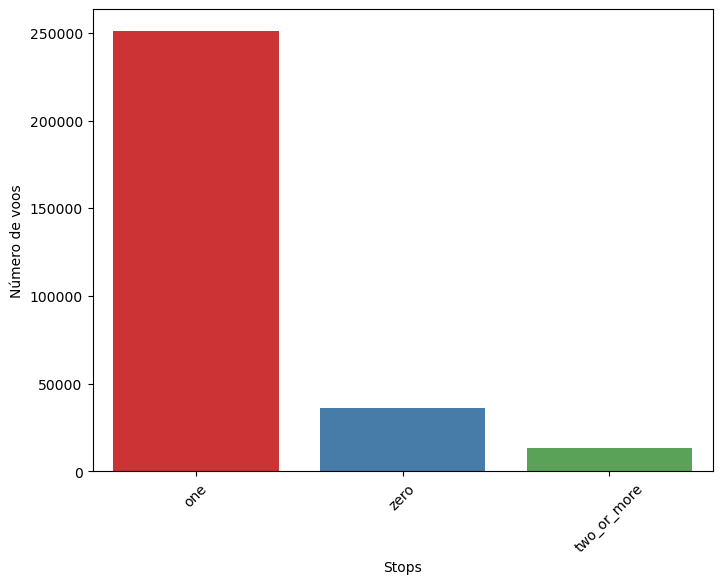

In [18]:
stops_counts = dataf['stops'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=stops_counts.index, y=stops_counts.values, palette="Set1")
plt.xlabel('Stops')
plt.ylabel('Número de voos')
plt.xticks(rotation=45)
plt.show()

Como é possível observar a grande maioria dos voos só teve **uma** única paragem.

#### Classe

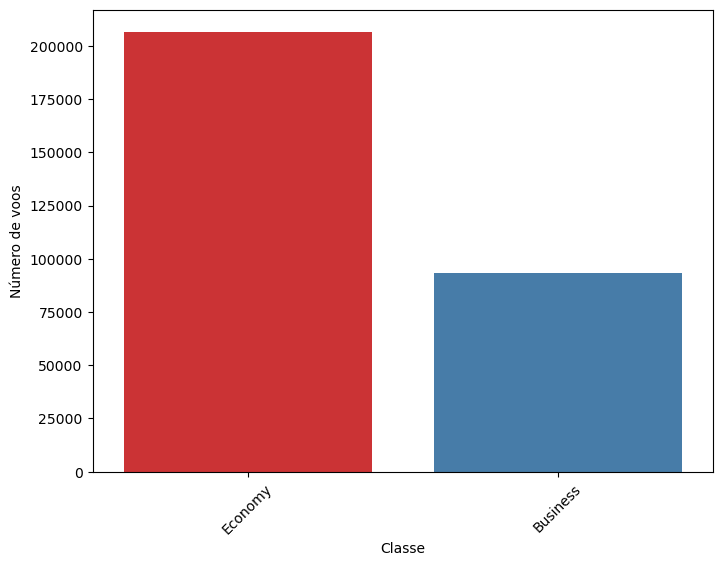

In [19]:
class_counts = dataf['class'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set1")
plt.xlabel('Classe')
plt.ylabel('Número de voos')
plt.xticks(rotation=45)
plt.show()

Como é possível observar a maioria dos voos foram realizados em classe **económica**.

### Relação entre as variáveis

#### Companhia aérea - preço

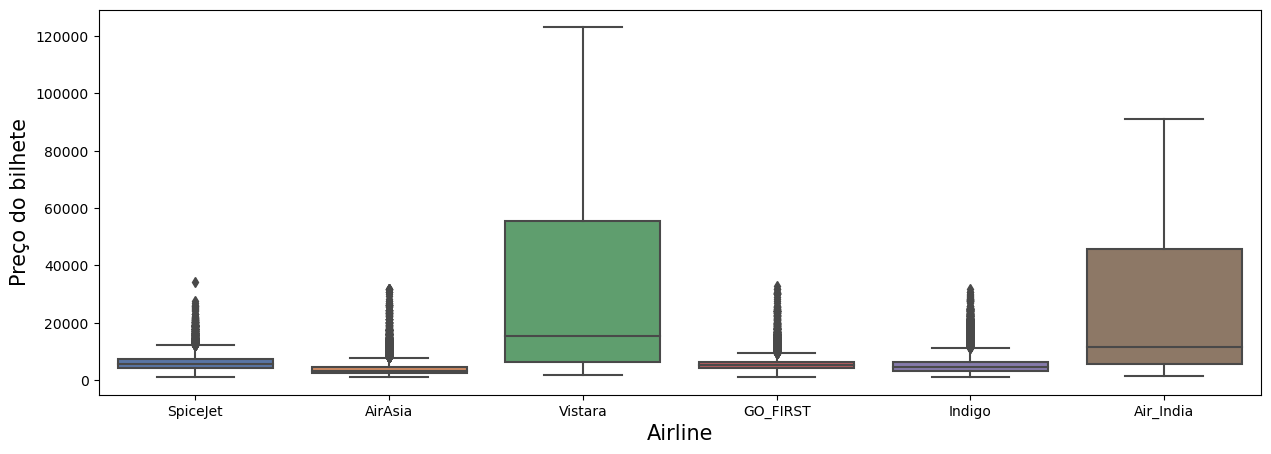

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x=dataf['airline'],y=dataf['price'],palette='deep')
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Preço do bilhete',fontsize=15)
plt.show()



#### Companhia aérea - preço em termos de classe

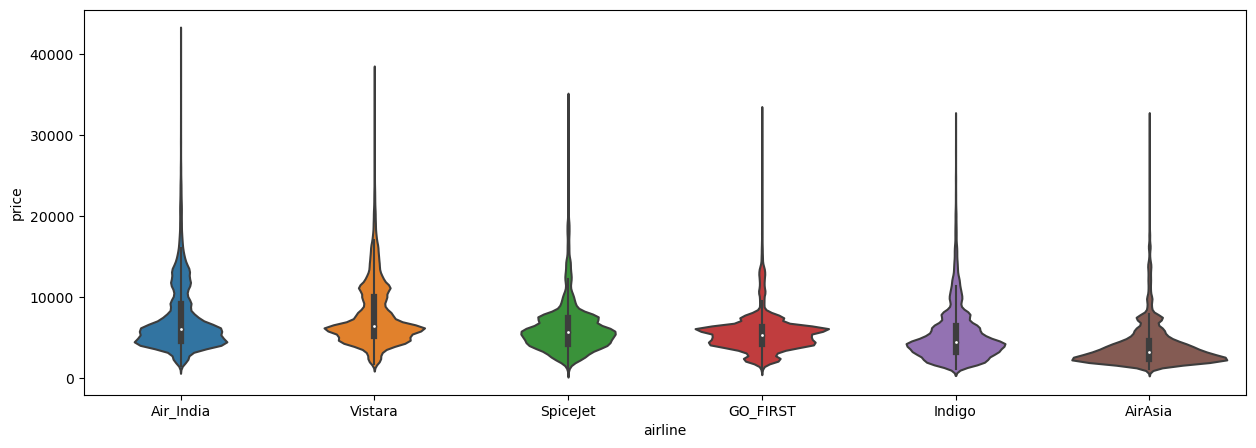

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(y="price", x="airline", data=dataf.loc[dataf["class"] == 'Economy'].sort_values("price", ascending=False), kind="boxen", ax=ax)
plt.show()

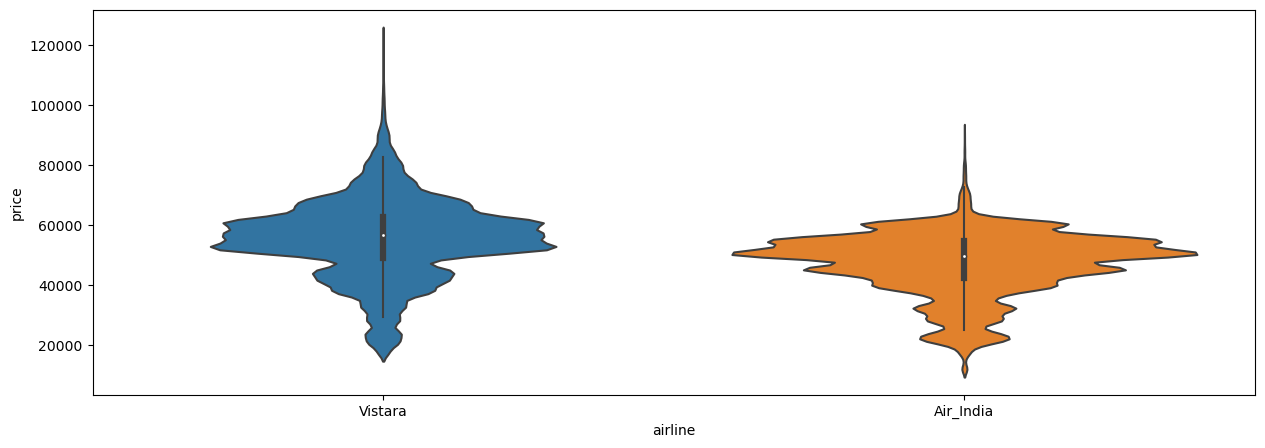

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(y="price", x="airline", data=dataf.loc[dataf["class"] == 'Business'].sort_values("price", ascending=False), kind="boxen", ax=ax)
plt.show()

Podemos observar que, **no geral**, a **Air Asia** é a companhia **mais barata** e a Vistara e a Air_India são as mais caras, sendo a **Air_India** a **mais cara**.
Da classe **Business**, apenas **2** companhias aéreas efetuam estes voos: a **Vistara** e a **Air_India**, sendo que os bilhetes da **Vistara** são **mais caros**.

#### Classe - Preço

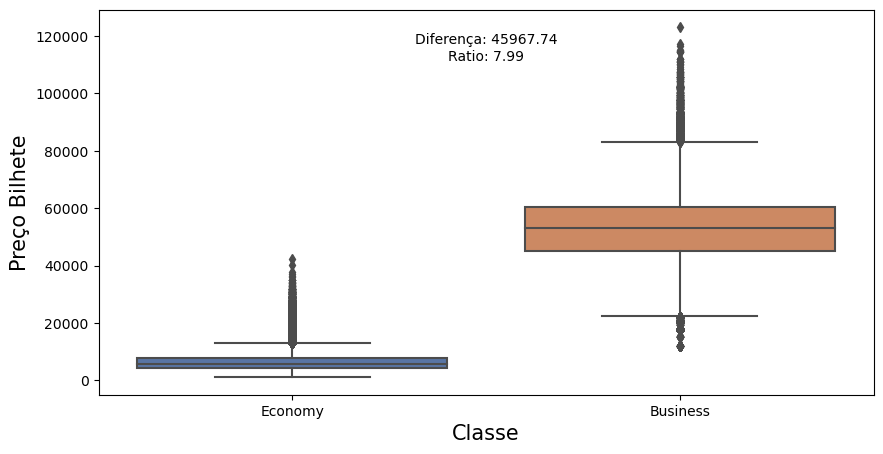

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='class', y='price', data=dataf, palette='deep')
plt.xlabel('Classe', fontsize=15)
plt.ylabel('Preço Bilhete', fontsize=15)

mean_prices = dataf.groupby('class')['price'].mean()


price_difference = mean_prices['Business'] - mean_prices['Economy']
price_ratio = mean_prices['Business'] / mean_prices['Economy']


plt.text(0.5, 0.9, f'Diferença: {price_difference:.2f}\nRatio: {price_ratio:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.show()

Como é possível observar há uma diferença bastante significativa entre os preços dos bilhetes **Economy** e **Business**, sendo que os da classe **Business** são bastante **mais caros**, sendo em média **7.99 vezes mais caros** que os da classe **Economy**.

#### Número de paragens - Preço

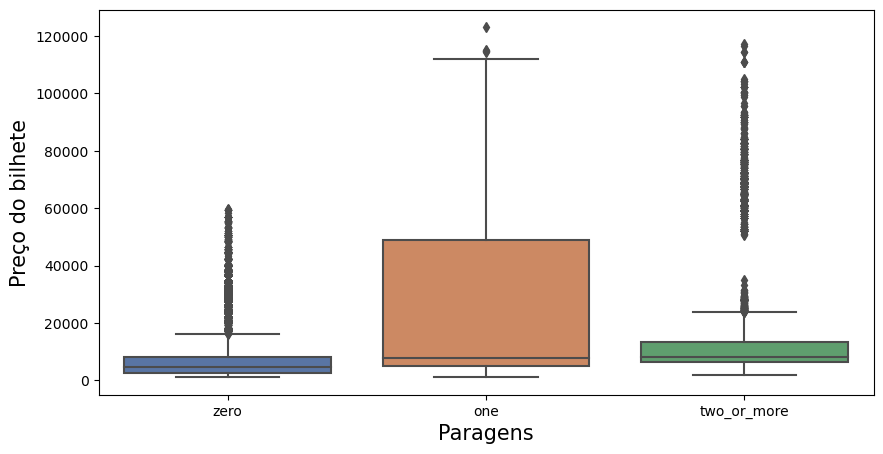

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=dataf,palette='deep')
plt.xlabel('Paragens',fontsize=15)
plt.ylabel('Preço do bilhete',fontsize=15)
plt.show()

Pelo que podemos observar, que, **em geral**, os bilhetes **mais caros** têm **uma paragem** apenas.

#### Número de paragens - Preço - Companhias aéreas

##### Classe Económica

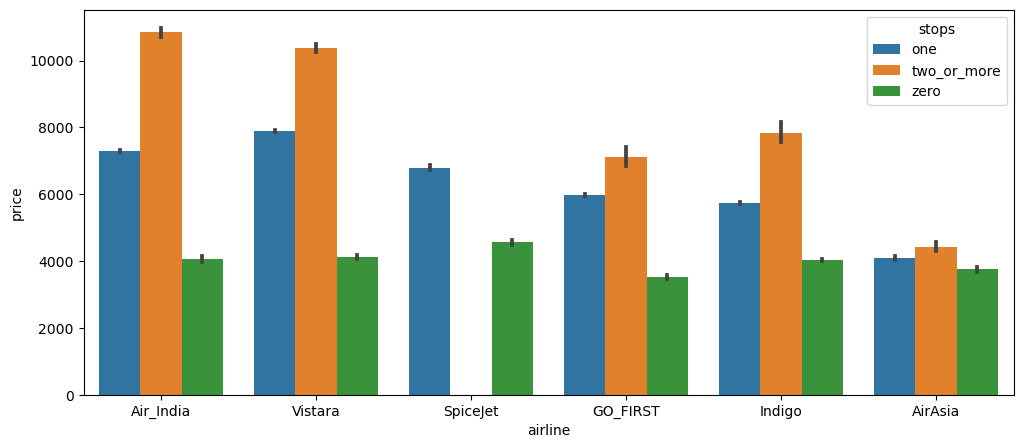

In [25]:
fig, ax_economy = plt.subplots(figsize=(12, 5))
sns.barplot(y="price", x="airline", hue="stops", data=dataf.loc[dataf["class"] == 'Economy'].sort_values("price", ascending=False), ax=ax_economy)
plt.show()


Podemos observar, que, na classe **Economy**, quanto **maior for o número de paragens maior será o preço do bilhete**.

##### Classe Business

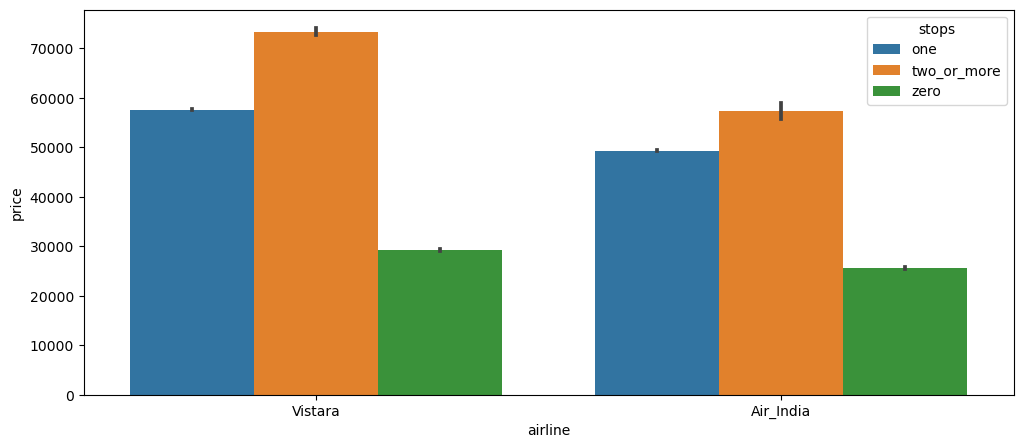

In [26]:
fig, ax_business = plt.subplots(figsize=(12, 5))
sns.barplot(y="price", x="airline", hue="stops", data=dataf.loc[dataf["class"] == 'Business'].sort_values("price", ascending=False), ax=ax_business)
plt.show()



Podemos observar que, na classe **Business**, quanto **maior for o número de paragens maior é o preço**.

#### Dias até partir - Preço

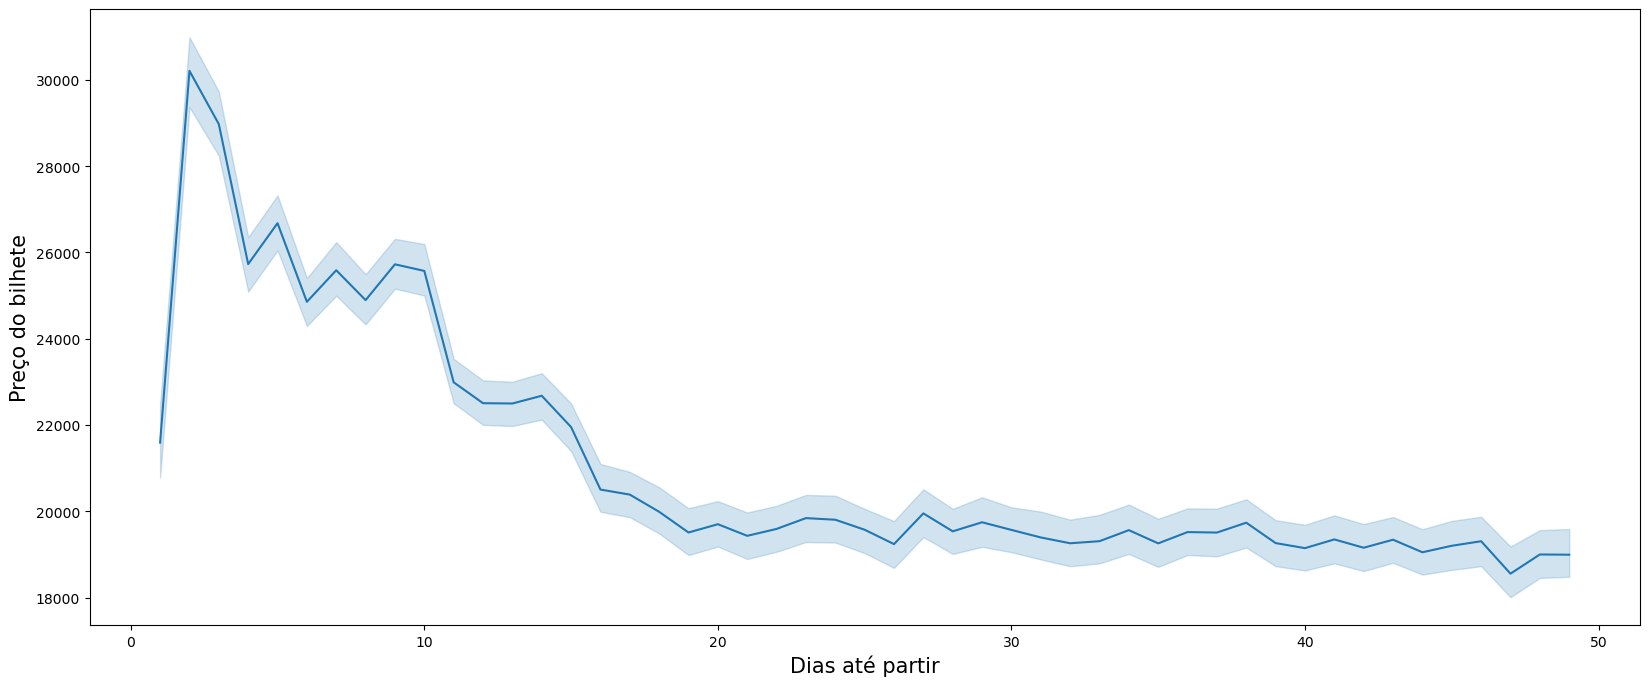

In [27]:

plt.figure(figsize=(20, 8))

# Line plot
sns.lineplot(data=dataf, x='days_left', y='price', palette='Set1')
plt.xlabel('Dias até partir', fontsize=15)
plt.ylabel('Preço do bilhete', fontsize=15)
plt.show()



##### Dias até partir - Preço - Companhia aérea

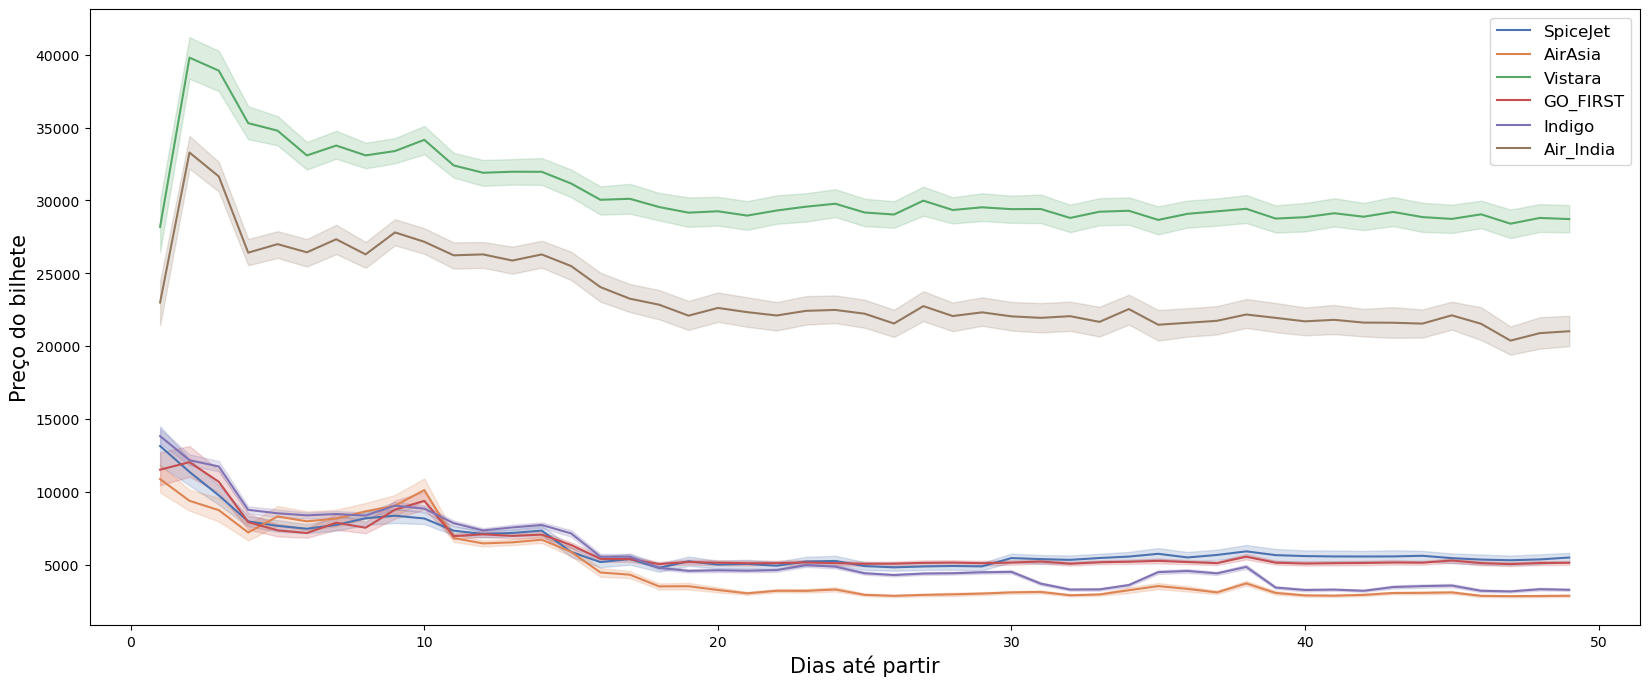

In [28]:
plt.figure(figsize=(20,8))
sns.lineplot(data=dataf,x='days_left',y='price',color='green',hue='airline',palette='deep')
plt.legend(fontsize=12)
plt.xlabel('Dias até partir',fontsize=15)
plt.ylabel('Preço do bilhete',fontsize=15)
plt.show()

Pela a análise do gráfico, podemos perceber que companhia aérea que a **Vistara** e a **Air_India** registam um **maior aumento de preços à medida que se aproxima do dia do voo**, enquanto que companhias como a **AirAsia e a GO_FIRST não registam um aumento tão grande**.

Em geral, é possível observar no gráfico, que **à medida que se aproxima da data do voo**, o bilhete **fica bastante mais caro**.

#### Source - Price

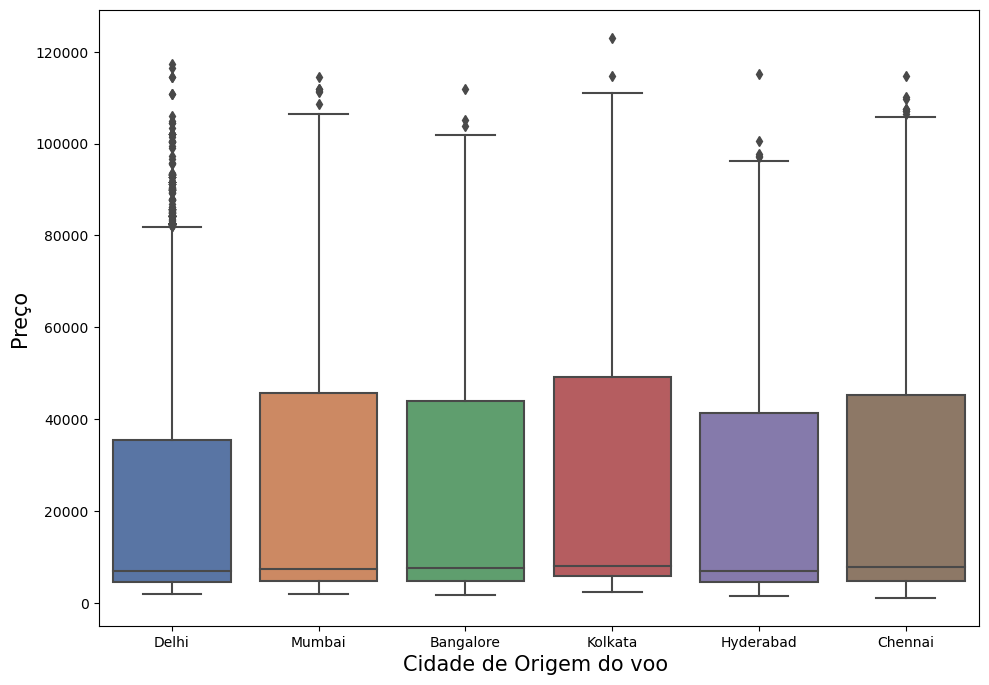

In [29]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='source_city', y='price', data=dataf, palette='deep')
plt.xlabel('Cidade de Origem do voo ', fontsize=15)
plt.ylabel('Preço', fontsize=15)

plt.show()

Como é possível observar, a origem **mais barata é Delhi** e a **mais cara Kolkata**.

#### Destination - Price


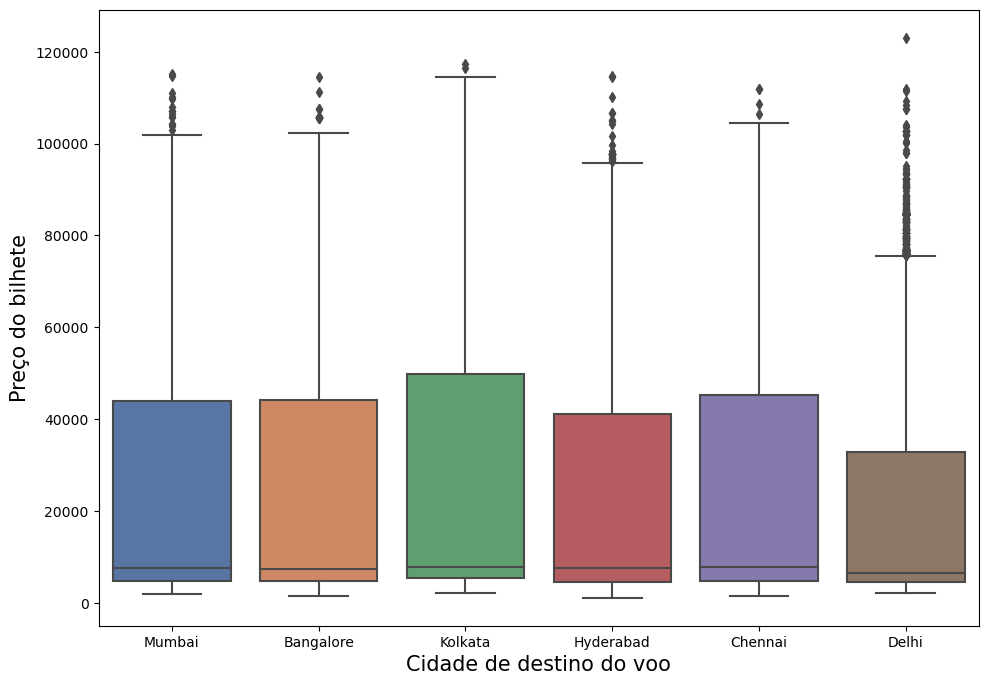

In [30]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 2)
sns.boxplot(x='destination_city', y='price', data=dataf, palette='deep')
plt.xlabel('Cidade de destino do voo', fontsize=15)
plt.ylabel('Preço do bilhete', fontsize=15)

plt.show()

Como é possível visualizar, o **destino mais barato é Delhi** e o **mais caro é Kolkata**.

#### Departure Time - Price

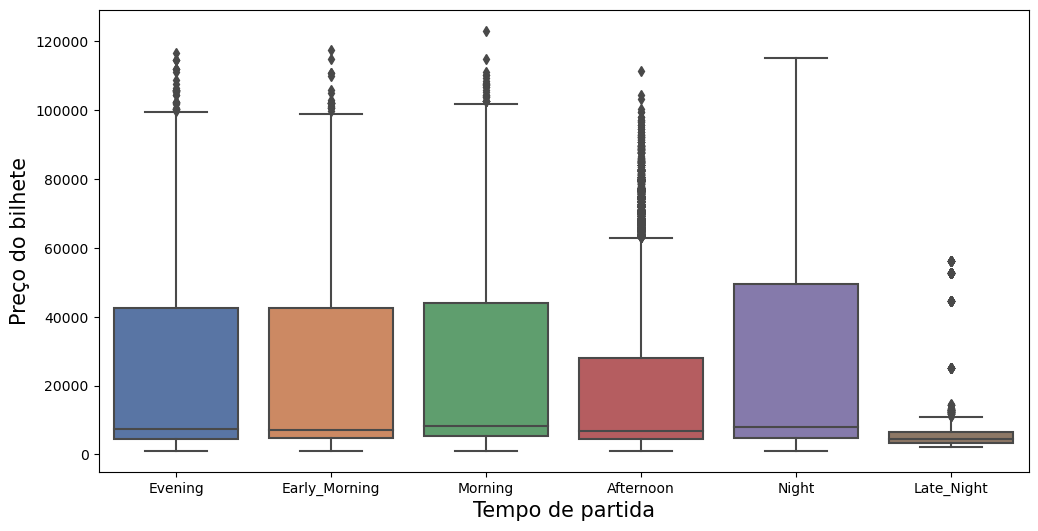

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
sns.boxplot(x='departure_time', y='price', data=dataf, palette='deep')
plt.xlabel('Tempo de partida', fontsize=15)
plt.ylabel('Preço do bilhete', fontsize=15)
plt.show()


O voo é **mais caro** para quando a partida é feita durante a **noite** (Night) e **mais barato** quando é feito durante a **madrugada** (Late Night).

#### Arrival Time - Price

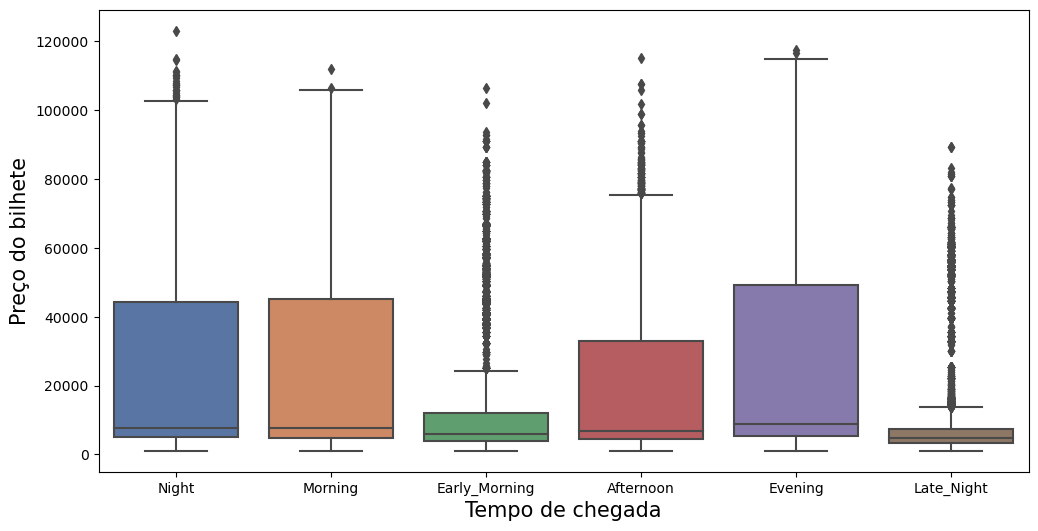

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
sns.boxplot(x='arrival_time', y='price', data=dataf, palette='deep')
plt.xlabel('Tempo de chegada', fontsize=15)
plt.ylabel('Preço do bilhete', fontsize=15)
plt.show()

O voo é **mais caro** quando chega de **noite** (Night) e **mais barato** quando chega de **madrugada** (Late_Night)

#### Duration - Price

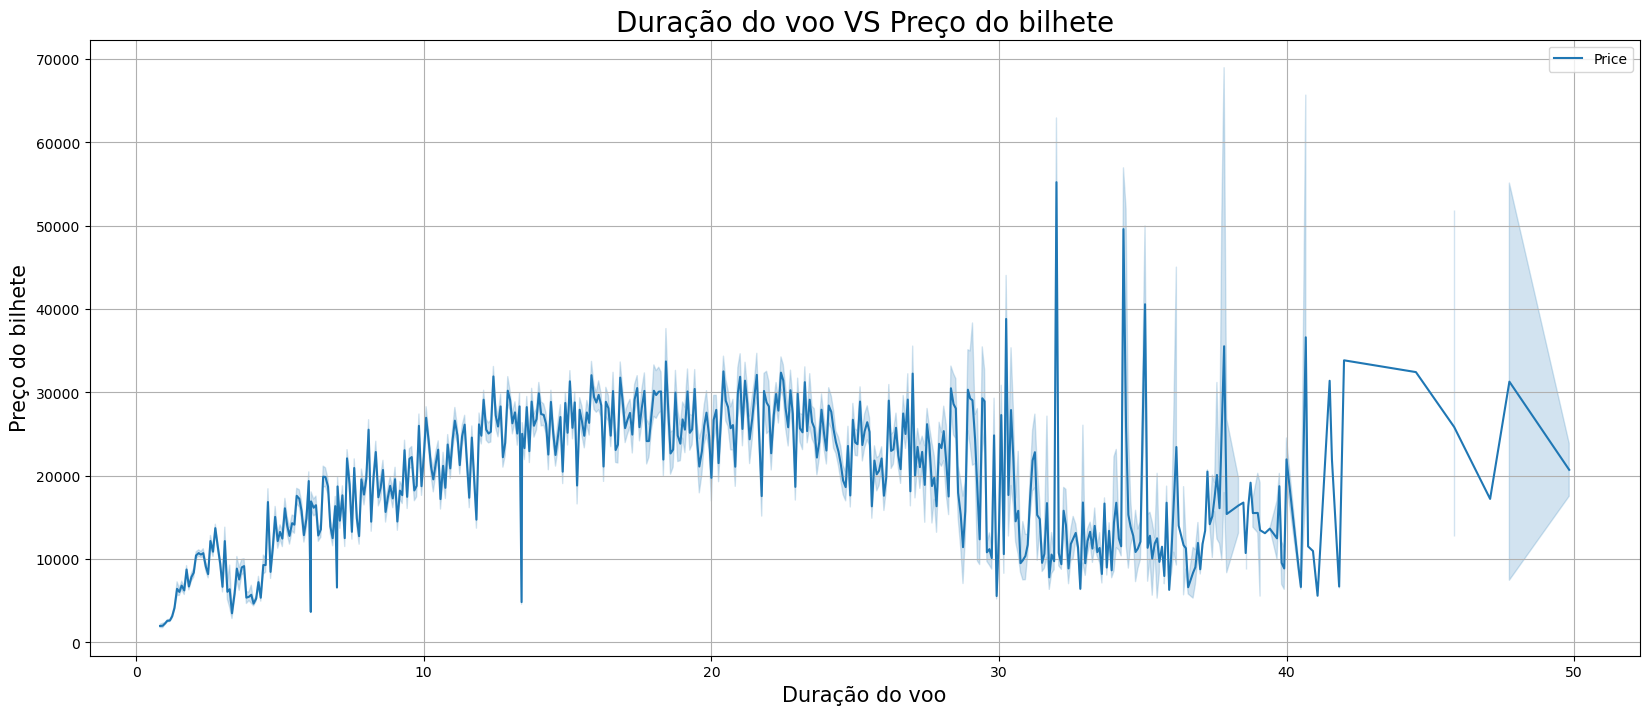

In [33]:
plt.figure(figsize=(20, 8))

sns.lineplot(data=dataf, x='duration', y='price', palette='deep', label='Price')

plt.title('Duração do voo VS Preço do bilhete', fontsize=20)
plt.xlabel('Duração do voo', fontsize=15)
plt.ylabel('Preço do bilhete', fontsize=15)

plt.legend()

plt.grid(True)

plt.show()




Como é possível observar, por norma, os **preços ficam mais altos entre as 20 e as 30 horas**.

### Correlação entre os atributos

Para usarmos uma matriz de correlação os atributos devem ser numéricos, pelo que os **atributos categóricos (airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class)** do nosso dataframe devem ser modificados para serem considerados como numéricos.


Assim, analisando cada um destes atributos, verificamos que:
- **stops** apresenta apenas **3 valores únicos** (zero, one, two_or_more)

In [34]:
dataf['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

Assim, podemos converter estas variáveis para numéricas.

In [35]:
dataf2 = dataf.copy()
dataf2["stops"] = dataf2["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)

- **class** apresenta apenas 2 valores únicos (Economy, Business)

In [36]:
dataf['class'].unique()

array(['Economy', 'Business'], dtype=object)

Assim, podemos associar valores a cada uma destas classes - 1: Economy e 2: Business

In [37]:
dataf2["class"] = dataf2["class"].replace({'Economy':0,'Business':1}).astype(int)

Quanto aos restantes atributos categóricos, decidimos ffatorizá-los de forma a considerá-los numéricos.

In [38]:
""" categorical_features = ["airline", "source_city", "destination_city", "departure_time", "arrival_time"]

encoder = OneHotEncoder(drop='first', sparse=False)

encoded_features = encoder.fit_transform(dataf2[categorical_features])

dummy_variables = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

dataf2 = pd.concat([dataf2, dummy_variables], axis=1)

dataf2 = dataf2.drop(categorical_features, axis=1) """ 

data_FAC = dataf2.copy()

features_to_encode = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']

for f in features_to_encode:
    data_FAC[f] = pd.factorize(data_FAC[f]) [0] + 1


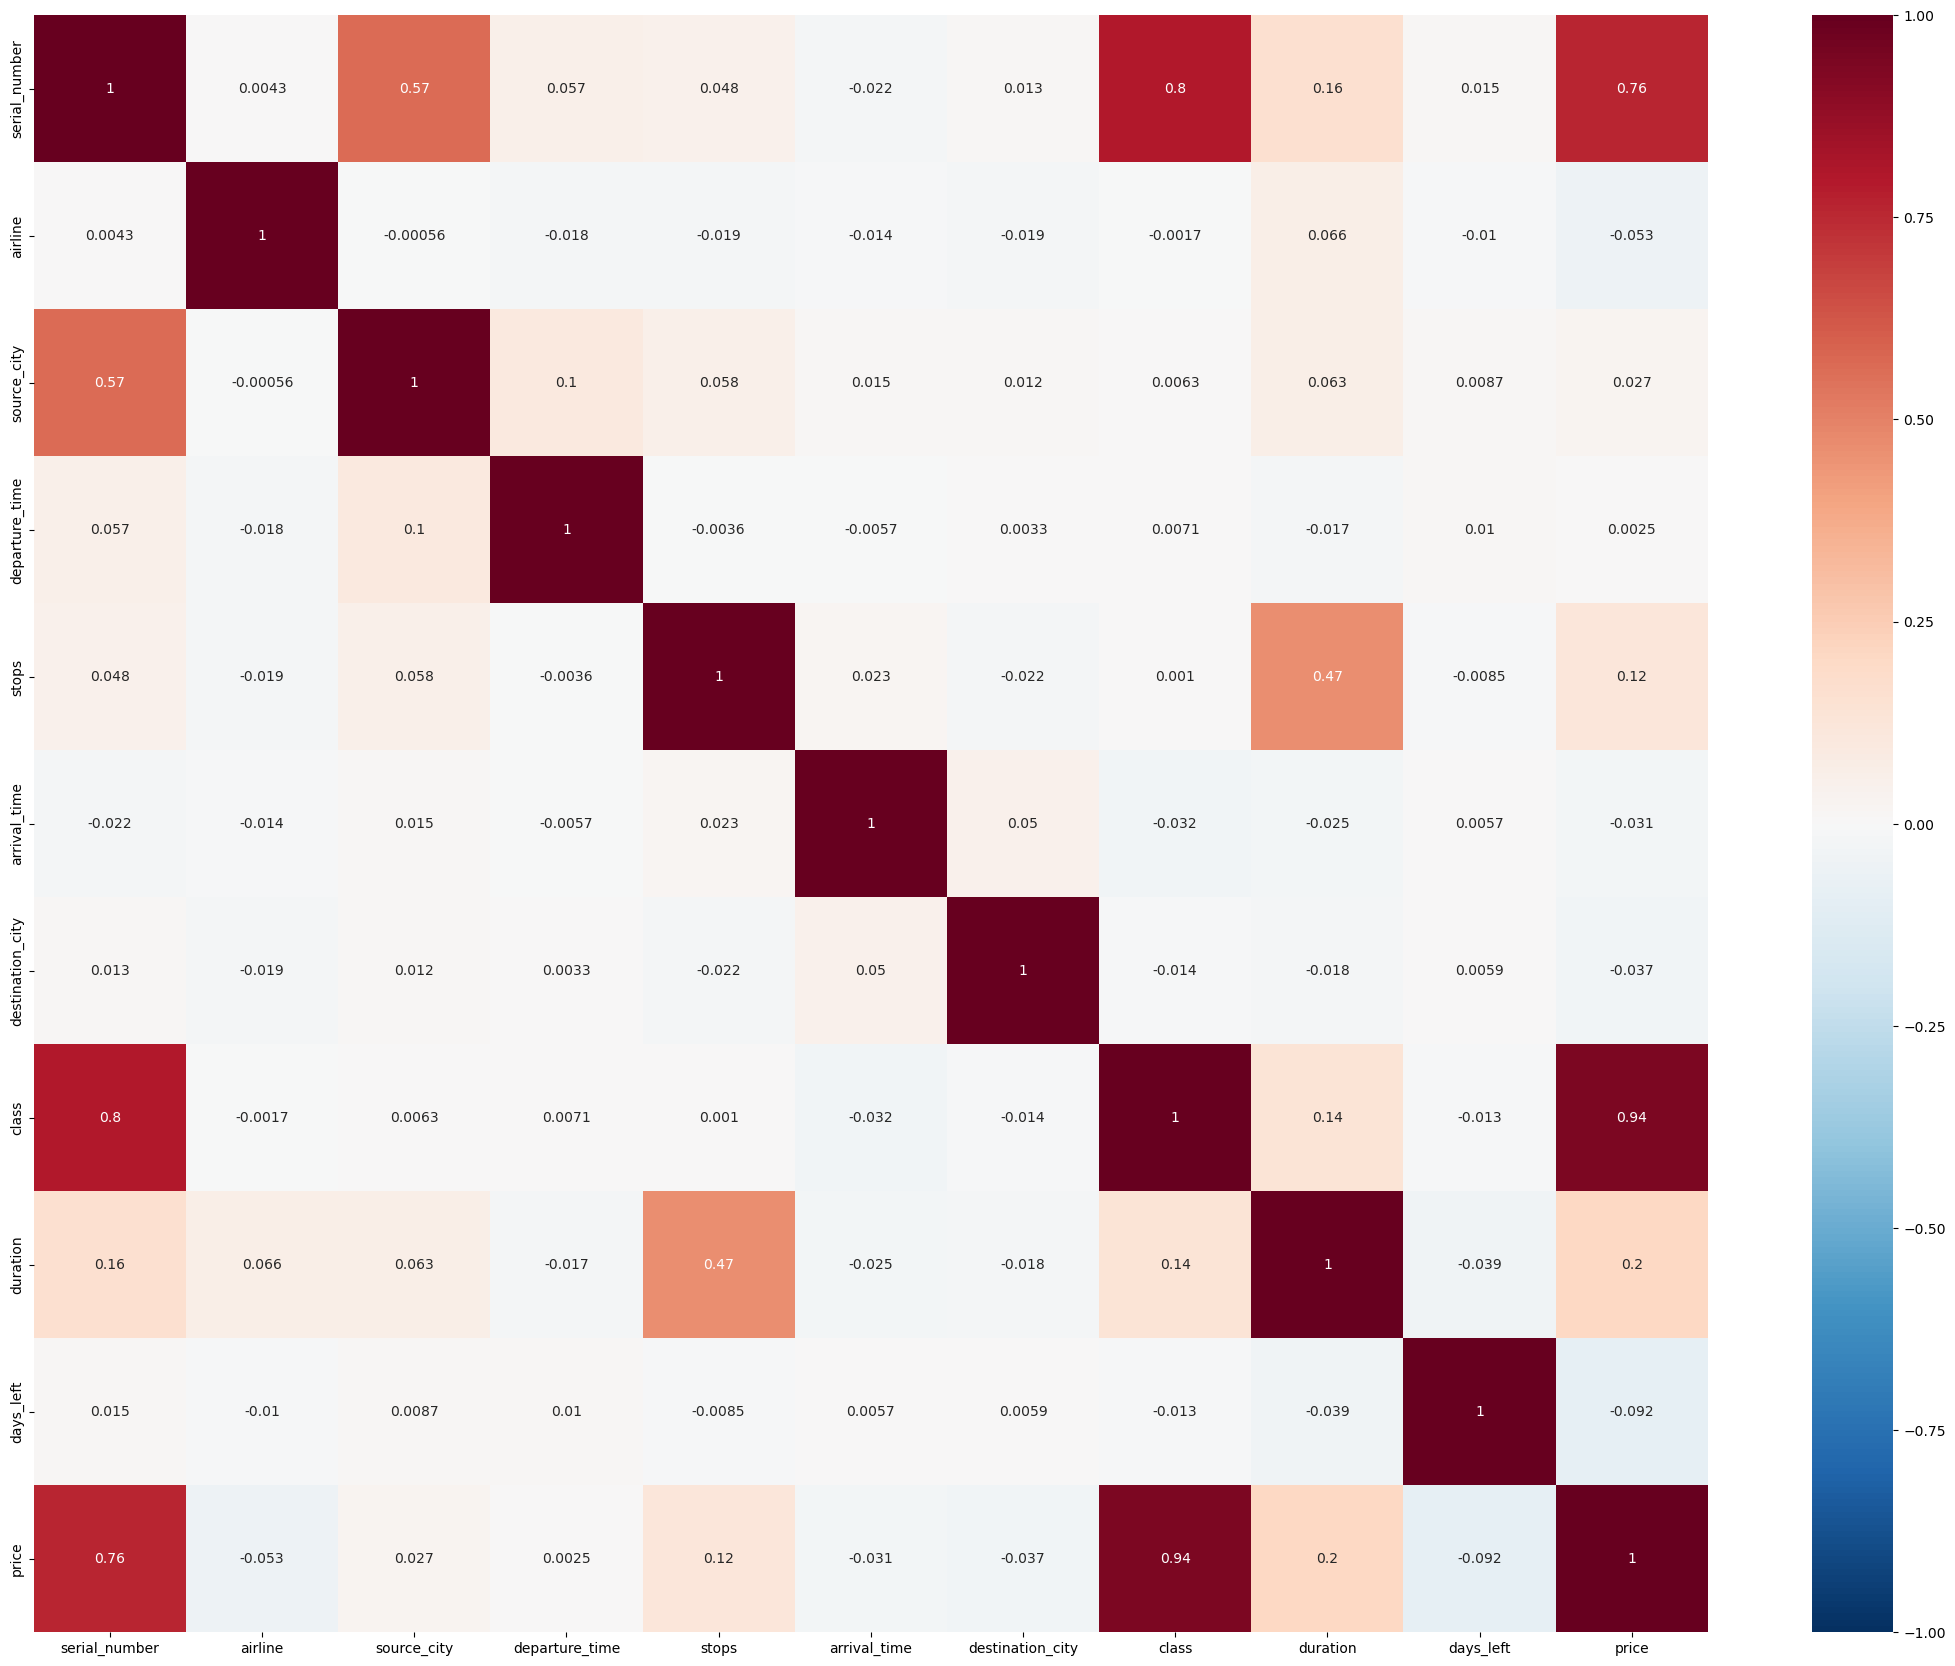

In [39]:
numeric_dataf2 = data_FAC.select_dtypes(include='number')

plt.figure(figsize=(27, 21))
sns.heatmap(numeric_dataf2.corr(), annot=True, vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r')
plt.show()
